In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("Company_Data.csv")
# print(df.iloc[172:175,:])

In [3]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df["Sales"].min(), df["Sales"].max()

(0.0, 16.27)

In [5]:
df = pd.get_dummies(df, columns=["ShelveLoc", "Urban", "US"], drop_first=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [6]:
df['Sales_class'] = pd.cut(x=df["Sales"], bins=[-1, 4, 8, 12, 17], labels=[0, 1, 2, 3])
df = df.drop(columns=["Sales"], axis = 1)
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_class
0,138,73,11,276,120,42,17,0,0,1,1,2
1,111,48,16,260,83,65,10,1,0,1,1,2
2,113,35,10,269,80,59,12,0,1,1,1,2
3,117,100,4,466,97,55,14,0,1,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0,1


In [7]:
x = df.iloc[:,0:11]
y = df.iloc[:,11]

In [8]:
df.shape

(400, 12)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
df.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes', 'Sales_class'],
      dtype='object')

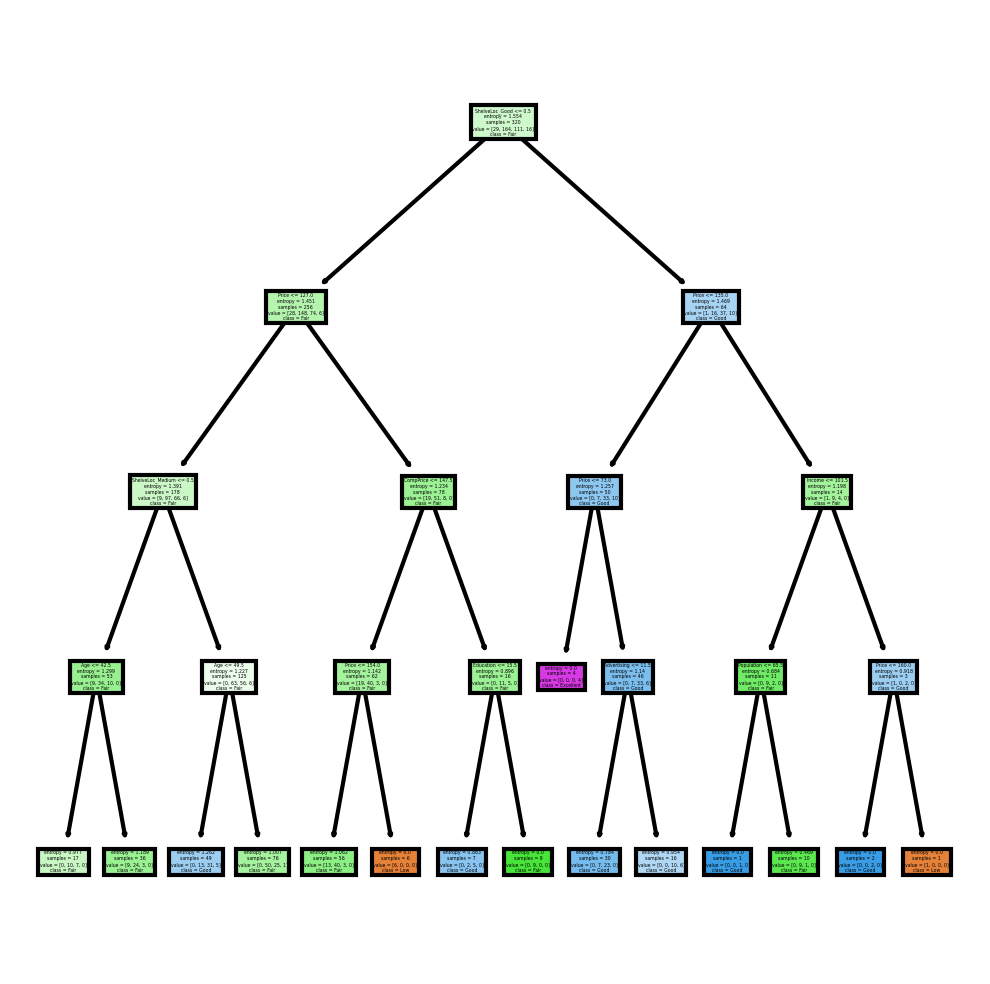

In [12]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 
    'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']
cn=['Low', 'Fair', 'Good', 'Excellent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [13]:
preds = model.predict(x_test) # predicting on test data set 
preds

array([1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0])

In [14]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      0.81      0.67        36
           2       0.36      0.38      0.37        26
           3       0.00      0.00      0.00        11

    accuracy                           0.49        80
   macro avg       0.23      0.30      0.26        80
weighted avg       0.37      0.49      0.42        80



/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, x, y, cv=5)
results

array([0.6   , 0.45  , 0.525 , 0.5375, 0.55  ])

In [16]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.57      0.81      0.67        36
           2       0.36      0.38      0.37        26
           3       0.00      0.00      0.00        11

    accuracy                           0.49        80
   macro avg       0.23      0.30      0.26        80
weighted avg       0.37      0.49      0.42        80



/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

params_grid ={"max_depth" : [5,7,9,10,12,14],
               "min_samples_leaf" : range(2,10),
               "min_samples_split" : [4,8,10,12,15,18,20],
               "max_leaf_nodes" : range(4,21) }

dt_estimator = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1)

dt_estimator.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10, 12, 14],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20]},
                   random_state=0)

In [18]:
dt_estimator.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 7,
 'max_depth': 14}

In [19]:
y_pred_t = dt_estimator.predict(x_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
print('dt_Train_RMSE:', rmse_t)
print('dt_Train_R2:', metrics.r2_score( y_train, y_pred_t ))

y_pred_test = dt_estimator.predict( x_test )
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred_test ) )
print('dt_Test_RMSE: ',rmse)
print('dt_Test_R2: ',metrics.r2_score( y_test, y_pred_test ))

dt_Train_RMSE: 0.6174544517614234
dt_Train_R2: 0.25330885165633843
dt_Test_RMSE:  0.7071067811865476
dt_Test_R2:  0.28555481134181737
